In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count,col, when,countDistinct,mean

spark = SparkSession.builder.getOrCreate()

In [8]:
#load the data
calendar_df = spark.read.option("header", "true").csv("work/data/calendar.csv")
listings_df = spark.read.option("header", "true").csv("./work/data/listings.csv")
loyer_df = spark.read.option("header", "true").option("sep",";").csv("./work/data/loyers.csv")

In [10]:
# make analysis of each dataset with histograms

#calendar_df
calendar_df.printSchema()
calendar_df.show()

#listings_df
listings_df.printSchema()
listings_df.show()

#loyer_df
loyer_df.printSchema()
loyer_df.show()


root
 |-- listing_id: string (nullable = true)
 |-- date: string (nullable = true)
 |-- available: string (nullable = true)
 |-- price: string (nullable = true)
 |-- adjusted_price: string (nullable = true)
 |-- minimum_nights: string (nullable = true)
 |-- maximum_nights: string (nullable = true)

+----------+----------+---------+-------+--------------+--------------+--------------+
|listing_id|      date|available|  price|adjusted_price|minimum_nights|maximum_nights|
+----------+----------+---------+-------+--------------+--------------+--------------+
|      3109|2024-09-11|        f|$100.00|          NULL|             2|            30|
|      3109|2024-09-12|        f|$100.00|          NULL|             2|            30|
|      3109|2024-09-13|        f|$100.00|          NULL|             2|            30|
|      3109|2024-09-14|        f|$100.00|          NULL|             2|            30|
|      3109|2024-09-15|        f|$100.00|          NULL|             2|            30|
|   

In [11]:
%pip install matplotlib geopandas shapely

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 1.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 2.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 6.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 5.6 MB/s eta 0:00:0000:0100:01m
Note: you may need to restart the kernel to use updated packages.


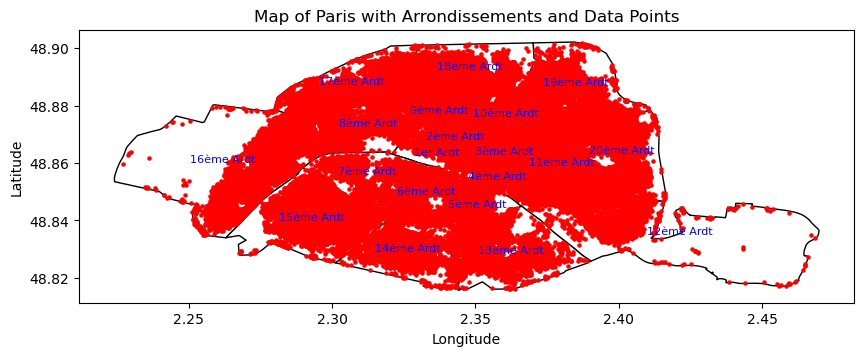

In [24]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
import matplotlib.pyplot as plt

# Load the shapefile of Paris arrondissements
arrondissements = gpd.read_file('./work/data/arrondissements/arrondissements.shp')
arrondissements
# Load your dataset with coordinates
data = pd.read_csv('./work/data/listings.csv')

# Convert the coordinates to a GeoDataFrame
geometry = [Point(xy) for xy in zip(data.longitude, data.latitude)]
geo_data = gpd.GeoDataFrame(data, geometry=geometry)

# Plot the arrondissements
fig, ax = plt.subplots(figsize=(10, 10))
arrondissements.plot(ax=ax, color='white', edgecolor='black')

# Plot the points
geo_data.plot(ax=ax, color='red', markersize=5)

# Add labels for arrondissements
for idx, row in arrondissements.iterrows():
    plt.annotate(text=row['l_ar'], xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                 horizontalalignment='center', fontsize=8, color='blue')

plt.title('Map of Paris with Arrondissements and Data Points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

/tmp/ipykernel_494/3451347352.py:18: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  geo_data = gpd.sjoin(geo_data, arrondissements, how='left')


AttributeError: 'NoneType' object has no attribute 'remove'

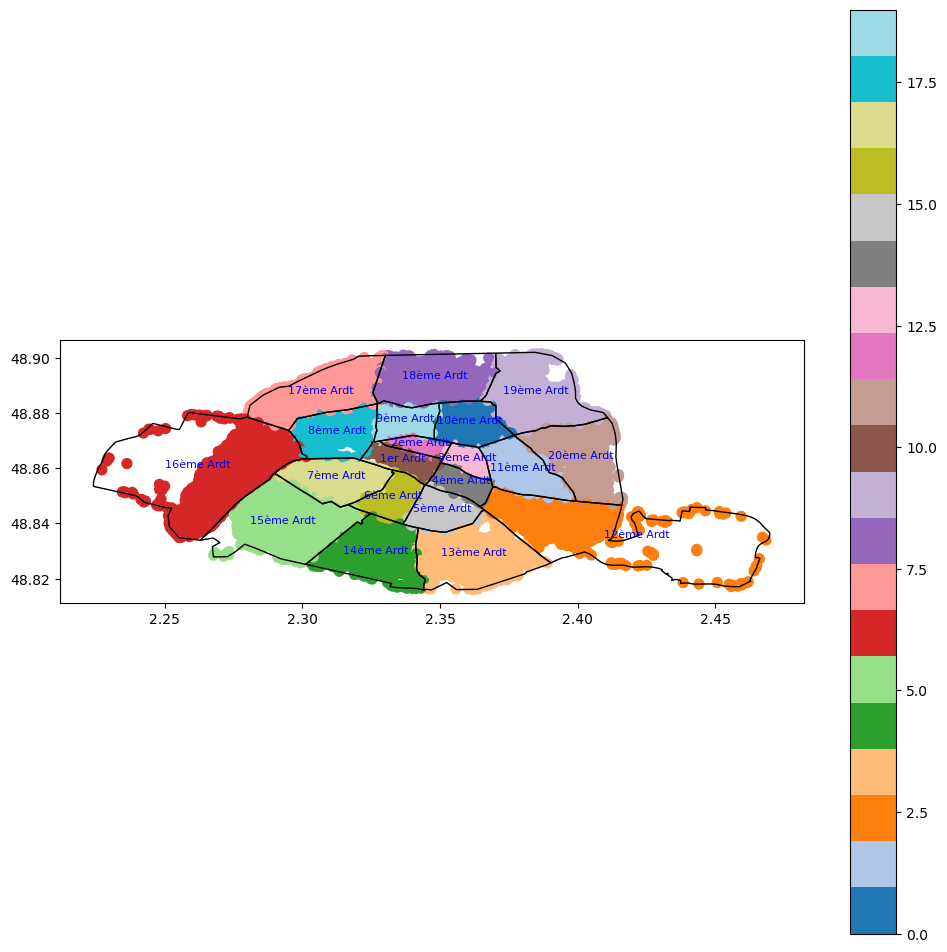

In [28]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


# Load the shapefile of Paris arrondissements
arrondissements = gpd.read_file('./work/data/arrondissements/arrondissements.shp')
arrondissements
# Load your dataset with coordinates
data = pd.read_csv('./work/data/listings.csv')

# Convert the coordinates to a GeoDataFrame
geometry = [Point(xy) for xy in zip(data.longitude, data.latitude)]
geo_data = gpd.GeoDataFrame(data, geometry=geometry)
# Perform the spatial join to get the arrondissement for each point
geo_data = gpd.sjoin(geo_data, arrondissements, how='left')

# Plot the arrondissements
fig, ax = plt.subplots(figsize=(12, 12))
arrondissements.boundary.plot(ax=ax, linewidth=1, edgecolor='black')

# Plot the points with different colors for each arrondissement
arrondissement_colors = geo_data['l_ar'].astype('category').cat.codes
geo_data.plot(ax=ax, column=arrondissement_colors, cmap='tab20', markersize=50, legend=True)

# Add labels for arrondissements
for idx, row in arrondissements.iterrows():
    plt.annotate(text=row['l_ar'], xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                 horizontalalignment='center', fontsize=8, color='blue')

# Create a legend
ax.get_legend().remove()

unique_arrondissements = geo_data['l_ar'].unique()
colors = plt.cm.tab20(range(len(unique_arrondissements)))
patches = [mpatches.Patch(color=colors[i], label=unique_arrondissements[i]) for i in range(len(unique_arrondissements))]
plt.legend(handles=patches, title="Arrondissements", bbox_to_anchor=(1.05, 1), loc='upper left')


plt.title('Map of Paris with Arrondissements and Data Points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

/tmp/ipykernel_494/3634187088.py:22: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  geo_data = gpd.sjoin(geo_data, arrondissements, how='left')


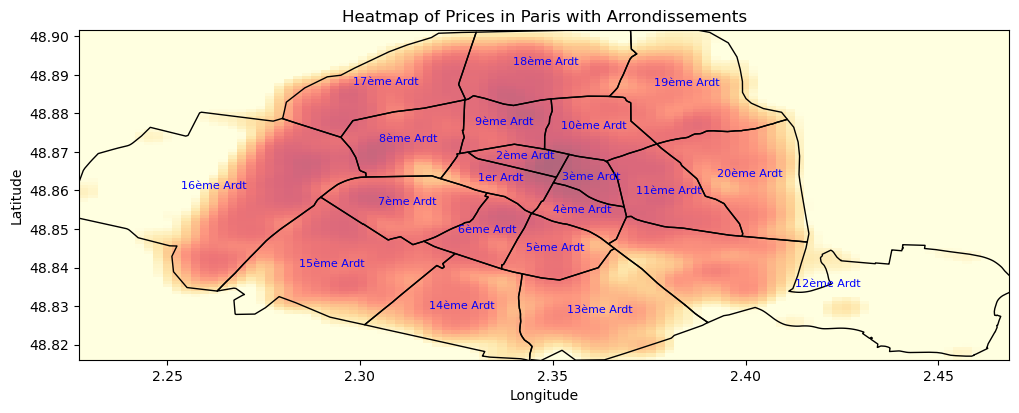

In [37]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
from matplotlib.colors import LogNorm


# Load the shapefile of Paris arrondissements
arrondissements = gpd.read_file('./work/data/arrondissements/arrondissements.shp')
# Load your dataset with coordinates
data = pd.read_csv('./work/data/listings.csv')
data['price'] = data['price'].replace('[\$,]', '', regex=True).astype(float)
data = data.replace([np.inf, -np.inf], np.nan).dropna(subset=['price', 'longitude', 'latitude'])

# Convert the coordinates to a GeoDataFrame
geometry = [Point(xy) for xy in zip(data.longitude, data.latitude)]
geo_data = gpd.GeoDataFrame(data, geometry=geometry)

# Perform the spatial join to get the arrondissement for each point
geo_data = gpd.sjoin(geo_data, arrondissements, how='left')


# Extract coordinates and prices
x = geo_data.geometry.x
y = geo_data.geometry.y
prices = geo_data['price']

# Perform kernel density estimation
xy = np.vstack([x, y])
kde = gaussian_kde(xy, weights=prices, bw_method=0.1)
xmin, xmax = x.min(), x.max()
ymin, ymax = y.min(), y.max()
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
density = kde(positions).reshape(xx.shape)

# Plot the arrondissements
fig, ax = plt.subplots(figsize=(12, 12))
arrondissements.boundary.plot(ax=ax, linewidth=1, edgecolor='black')

# Plot the heatmap
ax.imshow(np.rot90(density), cmap='YlOrRd', extent=[xmin, xmax, ymin, ymax], alpha=0.6,norm=LogNorm(vmin=density.min() + 1, vmax=density.max()))

# Add labels for arrondissements
for idx, row in arrondissements.iterrows():
    plt.annotate(text=row['l_ar'], xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                 horizontalalignment='center', fontsize=8, color='blue')

plt.title('Heatmap of Prices in Paris with Arrondissements')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [38]:
loyer_pddf = pd.read_csv("./work/data/loyers.csv",sep=";")

# source https://eldorado-immobilier.com/definition-t1t2t3t4-studio-quelle-surface-et-combien-de-pieces/
piece_to_surface = {
    1: 32,
    2:  45,
    3: 65,
    4: 81,
    5: 95,
    # Add more mappings as needed
}

loyer_pddf['surface'] = loyer_pddf['piece'].map(piece_to_surface)


# Multiply the piece column with the ref column
loyer_pddf['price'] = loyer_pddf['surface'] * loyer_pddf['ref']

# export the data
loyer_pddf.to_csv('work/data/loyer_with_price.csv', index=False)

/tmp/ipykernel_494/3702810699.py:30: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  geo_data1 = gpd.sjoin(geo_data1, arrondissements, how='left')
/tmp/ipykernel_494/3702810699.py:31: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  geo_data2 = gpd.sjoin(geo_data2, arrondissements, how='left')


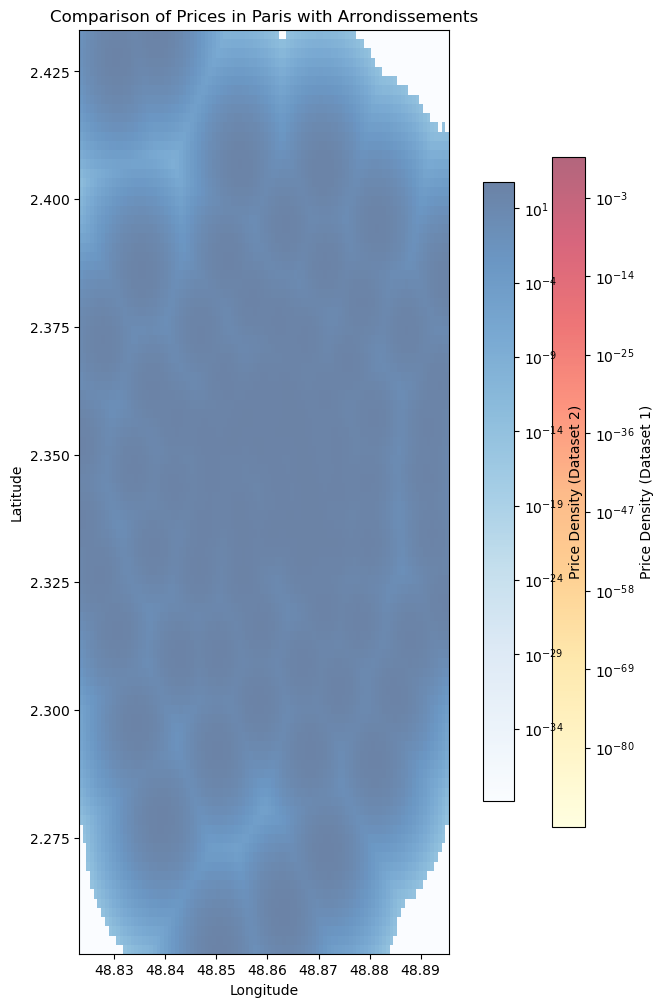

In [42]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
from matplotlib.colors import LogNorm

# Load the shapefile of Paris arrondissements
arrondissements = gpd.read_file('./work/data/arrondissements/arrondissements.shp')

# Load your first dataset with coordinates and prices
data1 = pd.read_csv('./work/data/listings.csv')
data1['price'] = data1['price'].replace('[\$,]', '', regex=True).astype(float)
data1 = data1.replace([np.inf, -np.inf], np.nan).dropna(subset=['price', 'longitude', 'latitude'])

# Load your second dataset with coordinates and prices
data2 = pd.read_csv('work/data/loyer_with_price.csv')
data2['price'] = data2['price'].replace('[\$,]', '', regex=True).astype(float)
data2 = data2.replace([np.inf, -np.inf], np.nan).dropna(subset=['price', 'geo_point_2d'])

# Convert the coordinates to GeoDataFrames
geometry1 = [Point(xy) for xy in zip(data1.longitude, data1.latitude)]
geo_data1 = gpd.GeoDataFrame(data1, geometry=geometry1)

geometry2 = [Point(xy) for xy in data2['geo_point_2d'].str.split(',', expand=True).astype(float).values]
geo_data2 = gpd.GeoDataFrame(data2, geometry=geometry2)

# Perform the spatial join to get the arrondissement for each point
geo_data1 = gpd.sjoin(geo_data1, arrondissements, how='left')
geo_data2 = gpd.sjoin(geo_data2, arrondissements, how='left')

# Extract coordinates and prices
x1 = geo_data1.geometry.x
y1 = geo_data1.geometry.y
prices1 = geo_data1['price']

x2 = geo_data2.geometry.x
y2 = geo_data2.geometry.y
prices2 = geo_data2['price']

# Perform kernel density estimation for both datasets
xy1 = np.vstack([x1, y1])
kde1 = gaussian_kde(xy1, weights=prices1, bw_method=0.1)
xmin1, xmax1 = x1.min(), x1.max()
ymin1, ymax1 = y1.min(), y1.max()
xx1, yy1 = np.mgrid[xmin1:xmax1:100j, ymin1:ymax1:100j]
positions1 = np.vstack([xx1.ravel(), yy1.ravel()])
density1 = kde1(positions1).reshape(xx1.shape)

xy2 = np.vstack([x2, y2])
kde2 = gaussian_kde(xy2, weights=prices2, bw_method=0.1)
xmin2, xmax2 = x2.min(), x2.max()
ymin2, ymax2 = y2.min(), y2.max()
xx2, yy2 = np.mgrid[xmin2:xmax2:100j, ymin2:ymax2:100j]
positions2 = np.vstack([xx2.ravel(), yy2.ravel()])
density2 = kde2(positions2).reshape(xx2.shape)

# Plot the arrondissements
fig, ax = plt.subplots(figsize=(12, 12))
arrondissements.boundary.plot(ax=ax, linewidth=1, edgecolor='black')

# Plot the heatmap for the first dataset
heatmap1 = ax.imshow(np.rot90(density1), cmap='YlOrRd', extent=[xmin1, xmax1, ymin1, ymax1], alpha=0.6, norm=LogNorm())

# Plot the heatmap for the second dataset
heatmap2 = ax.imshow(np.rot90(density2), cmap='Blues', extent=[xmin2, xmax2, ymin2, ymax2], alpha=0.6, norm=LogNorm())

# Add a colorbar for each heatmap
cbar1 = plt.colorbar(heatmap1, ax=ax, fraction=0.036, pad=0.04)
cbar1.set_label('Price Density (Dataset 1)')

cbar2 = plt.colorbar(heatmap2, ax=ax, fraction=0.036, pad=0.04)
cbar2.set_label('Price Density (Dataset 2)')

# Add labels for arrondissements
for idx, row in arrondissements.iterrows():
    plt.annotate(text=row['l_ar'], xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                 horizontalalignment='center', fontsize=8, color='blue')

plt.title('Comparison of Prices in Paris with Arrondissements')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

/tmp/ipykernel_494/1538595893.py:30: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  geo_data1 = gpd.sjoin(geo_data1, arrondissements, how='left')
/tmp/ipykernel_494/1538595893.py:31: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  geo_data2 = gpd.sjoin(geo_data2, arrondissements, how='left')


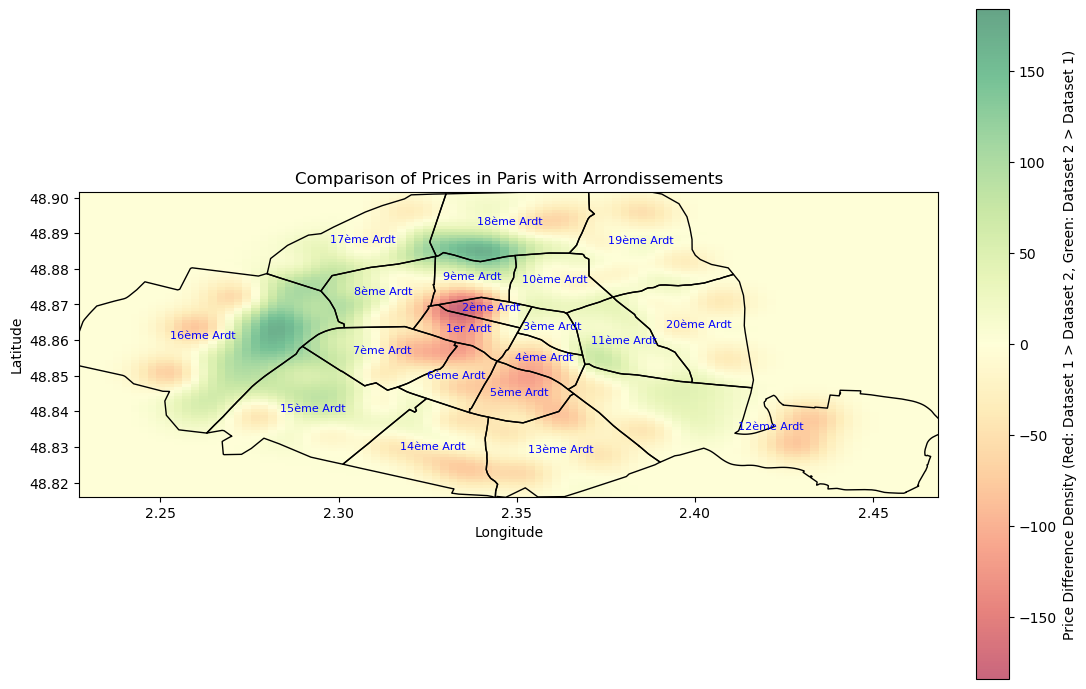

In [46]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
from matplotlib.colors import Normalize

# Load the shapefile of Paris arrondissements
arrondissements = gpd.read_file('./work/data/arrondissements/arrondissements.shp')

# Load your first dataset with coordinates and prices
data1 = pd.read_csv('./work/data/listings.csv')
data1['price'] = data1['price'].replace('[\$,]', '', regex=True).astype(float)
data1 = data1.replace([np.inf, -np.inf], np.nan).dropna(subset=['price', 'longitude', 'latitude'])

# Load your second dataset with coordinates and prices
data2 = pd.read_csv('./work/data/loyer_with_price.csv')
data2['price'] = data2['price'].replace('[\$,]', '', regex=True).astype(float)
data2 = data2.replace([np.inf, -np.inf], np.nan).dropna(subset=['price', 'geo_point_2d'])

# Convert the coordinates to GeoDataFrames
geometry1 = [Point(xy) for xy in zip(data1.longitude, data1.latitude)]
geo_data1 = gpd.GeoDataFrame(data1, geometry=geometry1)

geometry2 = [Point(float(xy.split(',')[1]), float(xy.split(',')[0])) for xy in data2['geo_point_2d']]
geo_data2 = gpd.GeoDataFrame(data2, geometry=geometry2)

# Perform the spatial join to get the arrondissement for each point
geo_data1 = gpd.sjoin(geo_data1, arrondissements, how='left')
geo_data2 = gpd.sjoin(geo_data2, arrondissements, how='left')

# Extract coordinates and prices
x1 = geo_data1.geometry.x
y1 = geo_data1.geometry.y
prices1 = geo_data1['price']

x2 = geo_data2.geometry.x
y2 = geo_data2.geometry.y
prices2 = geo_data2['price']

# Perform kernel density estimation for both datasets
xy1 = np.vstack([x1, y1])
kde1 = gaussian_kde(xy1, weights=prices1, bw_method=0.2)
xmin, xmax = min(x1.min(), x2.min()), max(x1.max(), x2.max())
ymin, ymax = min(y1.min(), y2.min()), max(y1.max(), y2.max())
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
density1 = kde1(positions).reshape(xx.shape)

xy2 = np.vstack([x2, y2])
kde2 = gaussian_kde(xy2, weights=prices2, bw_method=0.2)
density2 = kde2(positions).reshape(xx.shape)

# Calculate the difference in densities
density_diff = density1 - density2

# Plot the arrondissements
fig, ax = plt.subplots(figsize=(12, 12))
arrondissements.boundary.plot(ax=ax, linewidth=1, edgecolor='black')

# Plot the heatmap with a smooth color transition
norm = Normalize(vmin=-np.max(np.abs(density_diff)), vmax=np.max(np.abs(density_diff)))
heatmap = ax.imshow(np.rot90(density_diff), cmap='RdYlGn', extent=[xmin, xmax, ymin, ymax], alpha=0.6, norm=norm)

# Add a colorbar
cbar = plt.colorbar(heatmap, ax=ax, fraction=0.036, pad=0.04)
cbar.set_label('Price Difference Density (Red: Dataset 1 > Dataset 2, Green: Dataset 2 > Dataset 1)')

# Add labels for arrondissements
for idx, row in arrondissements.iterrows():
    plt.annotate(text=row['l_ar'], xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                 horizontalalignment='center', fontsize=8, color='blue')

plt.title('Comparison of Prices in Paris with Arrondissements')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

C:\Users\pltel\AppData\Local\Temp\ipykernel_19352\2231603915.py:13: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv('./data/listings_process.csv')
C:\Users\pltel\AppData\Local\Temp\ipykernel_19352\2231603915.py:30: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  geo_data1 = gpd.sjoin(geo_data1, arrondissements, how='left')
C:\Users\pltel\AppData\Local\Temp\ipykernel_19352\2231603915.py:31: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  geo_data2 = gpd.sjoin(geo_data2, arrondissements, how='left')


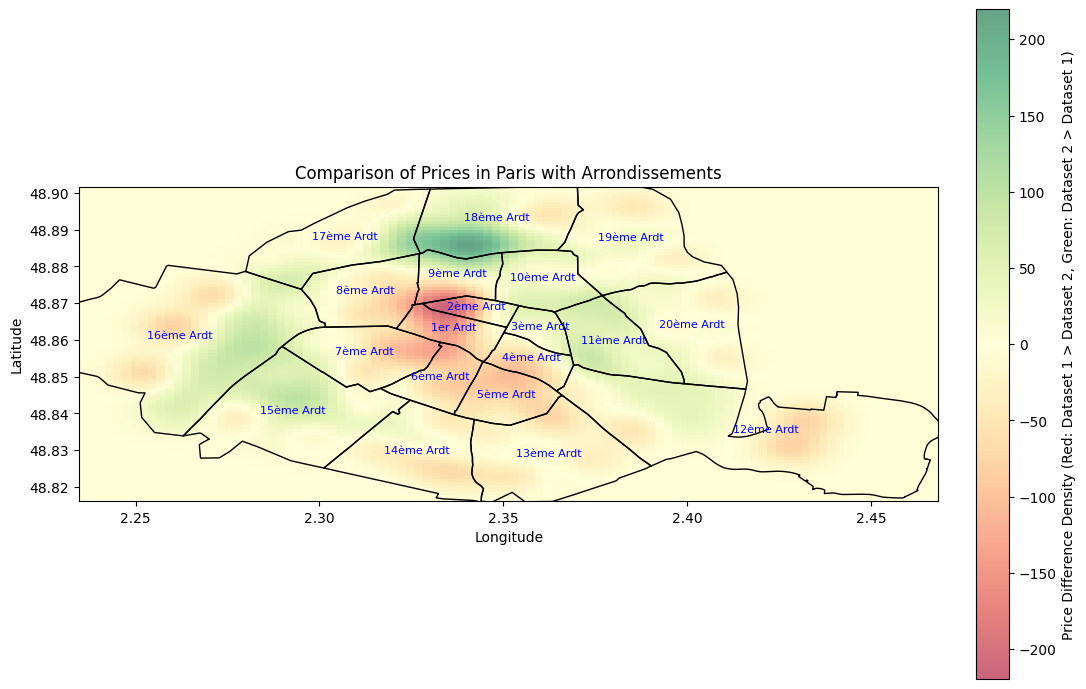

In [3]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
from matplotlib.colors import Normalize

# Load the shapefile of Paris arrondissements
arrondissements = gpd.read_file('./data/arrondissements.shp')

# Load your first dataset with coordinates and prices
data1 = pd.read_csv('./data/listings_process.csv')
data1['price_per_m2'] = data1['price_per_m2'].replace('[\$,]', '', regex=True).astype(float)
data1 = data1.replace([np.inf, -np.inf], np.nan).dropna(subset=['price_per_m2', 'longitude', 'latitude'])

# Load your second dataset with coordinates and prices
data2 = pd.read_csv('./data/loyer_process.csv')
data2['price_per_m2'] = data2['price_per_m2'].replace('[\$,]', '', regex=True).astype(float)
data2 = data2.replace([np.inf, -np.inf], np.nan).dropna(subset=['price_per_m2', 'geo_point_2d'])

# Convert the coordinates to GeoDataFrames
geometry1 = [Point(xy) for xy in zip(data1.longitude, data1.latitude)]
geo_data1 = gpd.GeoDataFrame(data1, geometry=geometry1)

geometry2 = [Point(float(xy.split(',')[1]), float(xy.split(',')[0])) for xy in data2['geo_point_2d']]
geo_data2 = gpd.GeoDataFrame(data2, geometry=geometry2)

# Perform the spatial join to get the arrondissement for each point
geo_data1 = gpd.sjoin(geo_data1, arrondissements, how='left')
geo_data2 = gpd.sjoin(geo_data2, arrondissements, how='left')

# Extract coordinates and prices
x1 = geo_data1.geometry.x
y1 = geo_data1.geometry.y
prices1 = geo_data1['price_per_m2']

x2 = geo_data2.geometry.x
y2 = geo_data2.geometry.y
prices2 = geo_data2['price_per_m2']

# Perform kernel density estimation for both datasets
xy1 = np.vstack([x1, y1])
kde1 = gaussian_kde(xy1, weights=prices1, bw_method=0.2)
xmin, xmax = min(x1.min(), x2.min()), max(x1.max(), x2.max())
ymin, ymax = min(y1.min(), y2.min()), max(y1.max(), y2.max())
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
density1 = kde1(positions).reshape(xx.shape)

xy2 = np.vstack([x2, y2])
kde2 = gaussian_kde(xy2, weights=prices2, bw_method=0.2)
density2 = kde2(positions).reshape(xx.shape)

# Calculate the difference in densities
density_diff = density1 - density2

# Plot the arrondissements
fig, ax = plt.subplots(figsize=(12, 12))
arrondissements.boundary.plot(ax=ax, linewidth=1, edgecolor='black')

# Plot the heatmap with a smooth color transition
norm = Normalize(vmin=-np.max(np.abs(density_diff)), vmax=np.max(np.abs(density_diff)))
heatmap = ax.imshow(np.rot90(density_diff), cmap='RdYlGn', extent=[xmin, xmax, ymin, ymax], alpha=0.6, norm=norm)

# Add a colorbar
cbar = plt.colorbar(heatmap, ax=ax, fraction=0.036, pad=0.04)
cbar.set_label('Price Difference Density (Red: Dataset 1 > Dataset 2, Green: Dataset 2 > Dataset 1)')

# Add labels for arrondissements
for idx, row in arrondissements.iterrows():
    plt.annotate(text=row['l_ar'], xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                 horizontalalignment='center', fontsize=8, color='blue')

plt.title('Comparison of Prices in Paris with Arrondissements')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()